## Negative Binomial Distribution For Glauber

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ROOT as R

In [ ]:
def nbd( n, k, npp ) :
    a = np.exp( n )

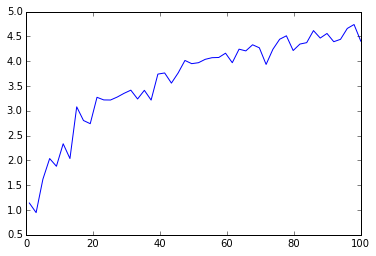

In [28]:
x = np.linspace( 1, 100 )
plt.plot( x, np.log( np.random.gamma(x)) )

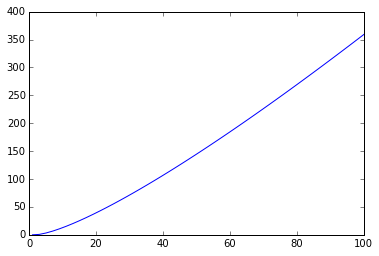

In [29]:
def rlng( x ):
    return R.TMath.LnGamma( x )

vrlng = np.vectorize( rlng )
plt.plot( x, vrlng( x ))

In [30]:
def rNBD( n, k, npp ) :
    a = R.TMath.Exp( R.TMath.LnGamma(n+k) - R.TMath.LnGamma(n+1) - R.TMath.LnGamma(k) )
    b = n * R.TMath.Log(npp/k) - (n+k) * R.TMath.Log(npp/k+1.0)
    return a * R.TMath.Exp( b )

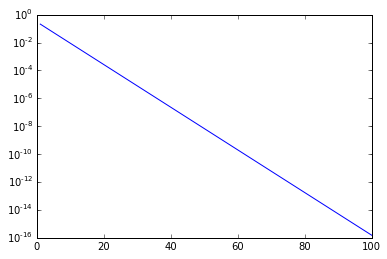

In [36]:
rNBD( 3, 2, 1.37)
vrNBD = np.vectorize( rNBD )
plt.plot( x, vrNBD( x, 1, 2.37 ) )
plt.yscale( 'log' )

hNBD = R.TH1D( "nbd", "nbd", 100, 0, 100 )

for i in range( 0, 100) :
    hNBD.SetBinContent( i, rNBD( i, 1, 1.37 ) )

In [35]:
def mult2( npart, ncoll ) :
    return 0.5 * ( 0.87 ) * npart + 0.13 * ncoll

In [37]:
def mult( npart, ncoll ) :
    nchPP = mult2( npart, ncoll )
    multIdeal = 0;
    for i in range( 0, int(nchPP) ):
        multIdeal += hNBD.GetRandom()
    return multIdeal


0.6698041985440066